In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
# Load the Reuters dataset
max_words = 10000  # Number of most frequent words to use
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words)

In [5]:
# Determine the number of classes
num_classes = max(y_train) + 1
num_classes

46

In [7]:
# Preprocess the data
max_sequence_length = 200  # Limit the input to the first 200 words
x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)


In [9]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
# Design the neural network
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length),
    GlobalAveragePooling1D(),  # Reduces the sequence to a single vector
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Softmax for multiclass classification
])

C:\Users\Rajeswari\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Appropriate loss for multiclass classification
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2)

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3297 - loss: 2.9481 - val_accuracy: 0.3762 - val_loss: 2.2026
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4185 - loss: 2.1798 - val_accuracy: 0.5047 - val_loss: 1.9198
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4936 - loss: 1.9480 - val_accuracy: 0.5381 - val_loss: 1.7315
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5591 - loss: 1.7622 - val_accuracy: 0.6233 - val_loss: 1.5870
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6070 - loss: 1.6204 - val_accuracy: 0.6505 - val_loss: 1.4676


In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6628 - loss: 1.4897
Test Accuracy: 0.65


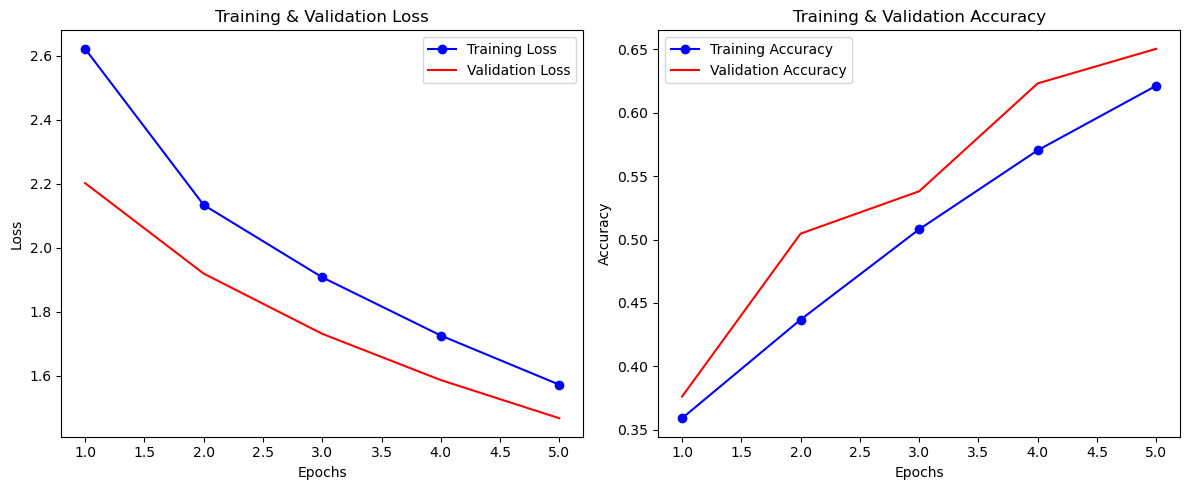

In [19]:
# Extract accuracy and loss history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


